# Scraping SPLC

In [117]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
response = requests.get("https://www.splcenter.org/fighting-hate/extremist-files/individual").content
soup = BeautifulSoup(response, "html.parser")

In [3]:
extremists = soup.find('div', class_="view-content").findAll('div', class_="views-row")

In [4]:
base_url = 'https://www.splcenter.org'
extremist_urls = []
for extremist in extremists:
    extremist_urls.append(base_url + extremist.find('a')['href'])

In [88]:
driver = webdriver.Chrome()
driver.get('https://www.splcenter.org/fighting-hate/extremist-files/individual')
field_items = driver.find_elements_by_class_name('field-items')
data1 = []
for _ in field_items:
    profile = {}
    if len(_.text) != 0 and len(_.text) < 100 and _.text.isupper() is False:
        profile.update({
            'name':_.text
        })
        data1.append(profile)
driver.close()

In [95]:
driver = webdriver.Chrome()
data2 = []
for url in extremist_urls:
    if 'wesearchr' not in url:
        driver.get(url)
        info = driver.find_element_by_class_name('extremist-info').text
        info_split = [_ for _ in info.split('\n') if _ != 'EXTREMIST INFO']
        profile2 = {}
        for piece in info_split:
            piece.split(' ',1)
            profile2.update({
                piece.split(' ',1)[0]:piece.split(' ',1)[1]
            })
        data2.append(profile2)
driver.close()

In [96]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [120]:
df1.head()

,name
0,Alex Jones
1,Alex Linder
2,"Andrew ""weev"" Auernheimer"
3,Andrew Anglin
4,April Gaede


In [105]:
df1 = df1[df1['name']!='WeSearchr']

In [98]:
df2.head()

,Born,Died,Group,Ideology,Location
0,1974,NaN,NaN,Antigovernment Movement,"Austin, Texas"
1,1966,NaN,NaN,Neo-Nazi,"Kirksville, Mo."
2,1985,NaN,NaN,Alt-Right Neo-Nazi,NaN
3,1984,NaN,NaN,Alt-Right Neo-Nazi,NaN
4,1966,NaN,National Vanguard,Neo-Nazi,"Kalispell, MT"


In [109]:
df = pd.concat([df1, df2], axis=1, sort=False)
df

,name,Born,Died,Group,Ideology,Location
0,Alex Jones,1974,NaN,NaN,Antigovernment Movement,"Austin, Texas"
1,Alex Linder,1966,NaN,NaN,Neo-Nazi,"Kirksville, Mo."
2,"Andrew ""weev"" Auernheimer",1985,NaN,NaN,Alt-Right Neo-Nazi,NaN
3,Andrew Anglin,1984,NaN,NaN,Alt-Right Neo-Nazi,NaN
4,April Gaede,1966,NaN,National Vanguard,Neo-Nazi,"Kalispell, MT"
5,Arthur Jensen,1923,2012,NaN,White Nationalist,NaN
6,August Kreis,1954,NaN,Aryan Nations,Christian Identity Neo-Nazi,"Union City, Tenn."
7,Augustus Sol Invictus,1983,NaN,NaN,Alt-Right,"Orlando, Florida"
8,Barbara Coe,1933,2013,Council of Conservative Citizens National Coal...,Anti-Immigrant White Nationalist,"Huntington Beach, CA"
9,Barry Black,1948,NaN,NaN,Ku Klux Klan,"Johnstown, PA"


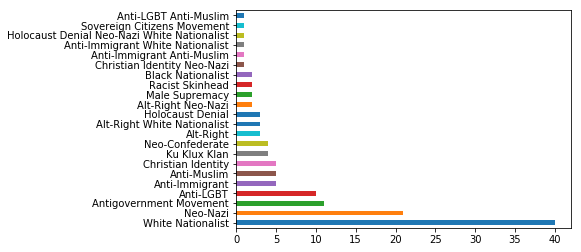

In [119]:
df.Ideology.value_counts().plot(kind='barh')
plt.show()